In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [3]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


Text(0.5, 1.0, '4')

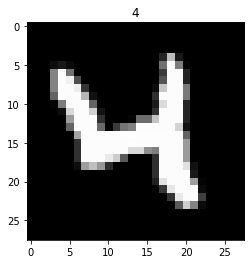

In [9]:
plt.imshow(X_treino[20], cmap='gray')
plt.title(y_treino[20])

In [11]:
X_treino = X_treino.reshape((len(X_treino), np.prod(X_treino.shape[1])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [13]:
X_treino = X_treino.astype('float32')
X_teste = X_teste.astype('float32')

In [15]:
X_treino /= 255
X_teste /= 255

In [24]:
y_treino = np_utils.to_categorical(y_treino, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [25]:
modelo = Sequential()
modelo.add(Dense(units=64, activation='relu', input_dim=784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=10, activation='softmax'))

In [26]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [31]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
historico = modelo.fit(X_treino, y_treino, epochs=30,
                      validation_data=(X_teste, y_teste))

ValueError: Error when checking target: expected dense_8 to have 2 dimensions, but got array with shape (60000, 10, 10, 10)

ValueError: Error when checking target: expected dense_4 to have 2 dimensions, but got array with shape (60000, 10, 10)

In [32]:
#historico.history.keys()

In [33]:
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_acc'])

NameError: name 'historico' is not defined

In [35]:
previsoes = modelo.predict(X_teste)
print(previsoes)

[[0.09273546 0.10118558 0.1284051  ... 0.06735574 0.10492823 0.09837722]
 [0.05639274 0.06709268 0.15332557 ... 0.0999366  0.1053296  0.08367167]
 [0.08920975 0.10059053 0.13179837 ... 0.08447205 0.10213324 0.10237235]
 ...
 [0.09459177 0.09549638 0.11280197 ... 0.07490424 0.10117296 0.11023612]
 [0.07069347 0.08367871 0.14798783 ... 0.06682616 0.1111472  0.11722808]
 [0.09259144 0.08701842 0.13463148 ... 0.07087693 0.10085305 0.11191618]]


In [36]:
y_teste_matrix = [np.argmax(t) for t in y_teste]
y_previsoes_matrix = [np.argmax(t) for t in previsoes]

In [37]:
confusao = confusion_matrix(y_teste_matrix, y_previsoes_matrix)
print(confusao)

[[   0    0 7682    4  806  341   41  146]
 [   0    0  700    0  239   37    1    3]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]


In [38]:
y_treino[20]

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]

In [39]:
X_treino[20]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [40]:
novo = X_treino[20]
novo = np.expand_dims(novo, axis=0)

In [ ]:
pred = modelo.predict(novo)